https://stepik.org/lesson/1370093/step/8

In [ ]:
# @title Nesterov
import numpy as np

# Функции
f = lambda x: -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2
# Производная усеченного показателя качества
dQk = lambda x, y: 2 * (x.T @ (x @ (w - gamma * v) - y)) / len(y)

# Данные
coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = f(coord_x)                # значения функции по оси ординат
X = np.array([[1, x, x**2, x**3] for x in coord_x]) # создаём матрицу признаков

# Параметры
sz = len(coord_x)	                        # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001])  # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])              # начальные значения параметров модели
N = 500                                     # число итераций алгоритма SGD
lm = 0.02       # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
gamma = 0.8     # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros(len(w)) # начальное значение [0, 0, 0, 0]

Qe = ((X @ w - coord_y)**2).mean() # начальное значение среднего эмпирического риска
np.random.seed(0)   # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    # создаём мини-батч:
    k = np.random.randint(0, sz-batch_size-1)
    X_batch = X[k:k+batch_size]
    y_batch = coord_y[k:k+batch_size]

    # градиентный шаг:
    Qk = ((X_batch @ w - y_batch)**2).mean() # усеченный эмпирический риск
    Qe = lm * Qk + (1 - lm) * Qe             # новое качество
    v = gamma * v + (1 - gamma) * eta * dQk(X_batch, y_batch) # псевдоградиент
    w -= v                                   # обновляем веса

Q = ((X @ w - coord_y)**2).mean() # итоговое качество

print('Qe =', Qe)
print('Q =', Q)
print(w)

Qe = 0.02158977628558282
Q = 0.02023818813679436
[ 2.00087266 -0.69417019 -0.1972715   0.04912324]


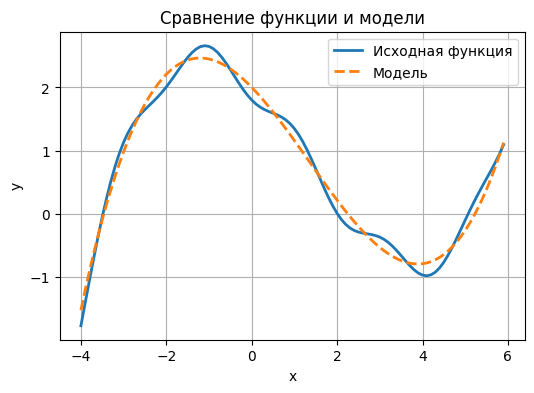

In [ ]:
# Предсказания модели
y_pred = X @ w

import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(6, 4))
plt.plot(coord_x, coord_y, label="Исходная функция", linewidth=2)
plt.plot(coord_x, y_pred, label="Модель", linestyle="--", linewidth=2)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение функции и модели")
plt.grid()
plt.show()

In [ ]:
# Vadim Kopeykin https://stepik.org/lesson/1370093/step/8?discussion=10521672&thread=solutions&unit=1386283
import numpy as np

def func(x): # исходная функция, которую нужно аппроксимировать моделью a(x)
    return -0.7 * x - 0.2 * x**2 + 0.05 * x**3 - 0.2 * np.cos(3 * x) + 2

def loss(w, X, y): # средний эмпирический риск
    return ((X @ w - y)**2).mean()

def grad(w, X, y): # производная среднего эмпирического риска по вектору w
    return 2 * (X @ w - y) @ X / len(X)

x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6) с шагом 0.1
y = func(x)                   # значения функции по оси ординат

eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])             # начальные значения параметров модели
N = 500                                    # число итераций алгоритма SGD
lm = 0.02            # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20      # размер мини-батча (величина K = 20)
gamma = 0.8          # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros_like(w) # начальное значение [0, 0, 0, 0]

X = x.reshape(-1, 1) ** np.arange(len(w)) # матрица признаков
Qe = loss(w, X, y) # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

for _ in range(N):
    k = np.random.randint(len(X) - batch_size - 1) # сгенеировать индекс начала батча
    batch = np.arange(k, k + batch_size)           # индексы батча

    Qe += lm * (loss(w, X[batch], y[batch]) - Qe)  # обновить экспоненциальное среднее Qe

    v = gamma * v + (1 - gamma) * eta * grad(w - gamma * v, X[batch], y[batch])
    w -= v # обновить параметры модели

Q = loss(w, X, y) # вычислить итоговое значение среднего эмпирического риска

print('Qe =', Qe)
print('Q =', Q)
print(w)

Qe = 0.021589776285582847
Q = 0.02023818813679436
[ 2.00087266 -0.69417019 -0.1972715   0.04912324]
